In [1]:
import os as os
import pandas as pd
import numpy as np
import sygma
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw

import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist, squareform, cdist
%matplotlib inline

#### WIP not for use in manuscript

In [2]:
TOP = os.getcwd().replace('notebooks', '')

In [3]:
raw_dat_dir = TOP + 'data/raw/'
processed_dat_dir = TOP + 'data/processed/'
interim_dat_dir = TOP + 'data/interim/'
figures_dir = TOP + 'reports/figures/'
external_dir = TOP + 'data/external/'

In [6]:
df = pd.read_excel(external_dir+'matches_expt_times_ivt_mx_040621.xlsx', sheet_name = 'metab_similarity')

In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [19]:
df = df[['Metabolite_INCHIKEY', '3,4-TDA', '2,3-TDA', '2,4-TDA',
       '2,5-TDA', '2,6-TDA']]

<AxesSubplot:>

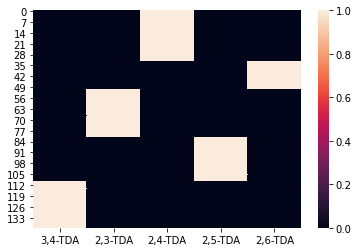

In [54]:
sns.heatmap(df.iloc[:,1:])

In [30]:
df2 = df.T

df2.columns = df2.iloc[0]
df2 = df2[1:]

In [42]:
import seaborn as sns

In [51]:
df2.isnull().sum().sum()

0

In [60]:
import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist, squareform, cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster


In [61]:
def distance_matrix(df):
    D_mgrn = pd.DataFrame(squareform(pdist(df, 'cosine')), columns = df.index, index = df.index)
    return D_mgrn

<AxesSubplot:>

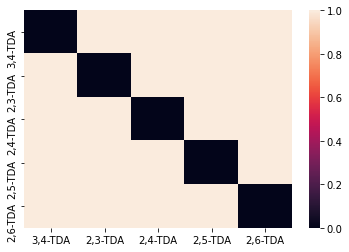

In [69]:
sns.heatmap(distance_matrix(df2).fillna(0))